In [4]:
from sympy import *
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

init_vprinting()

t, u1, u2 = symbols('t u_1 u_2')

# Pitch and load angles
theta, alpha = dynamicsymbols('\ttheta \talpha')

# Position
# x,z = dynamicsymbols('x z')
# xL = x - l*sin(alpha)
# zL = z - l*cos(alpha)

xL,zL = dynamicsymbols('x_L z_L')
x = xL + l*sin(alpha)
z = zL + l*cos(alpha)

# Velocities
xdot = diff(x,t)
zdot = diff(z,t)

xLdot = diff(xL,t)
zLdot = diff(zL,t)

thetadot = diff(theta,t)
alphadot = diff(alpha,t)

# Accelerations
xddot = diff(xdot,t)
zddot = diff(zdot,t)

xLddot = diff(xLdot,t)
zLddot = diff(zLdot,t)

thetaddot = diff(thetadot,t)
alphaddot = diff(alphadot,t)

# Physical parameters
m, M, l, g, I = symbols('m M l g I')

# Auxiliary variables
#ux = sin(alpha)
#uz = cos(alpha)
#ualpha = sin(theta-alpha)

In [7]:
eqX = M*xddot - sin(theta)*u1 + m*xLddot
eqX = collect(expand(eqX),xLddot)
eqX 

In [51]:
eqx=simplify(-cos(alpha)*sin(theta-alpha)+sin(theta))
eqz=simplify(sin(alpha)*sin(theta-alpha)+cos(theta))
#solve(expand_trig(eqz),alpha)
solve(eqx-eqz*u1,theta)

In [11]:
eqZ = M*zddot - cos(theta)*u1 + m*zLddot + (M+m)*g
eqZ = collect(expand(eqZ),zLddot)
eqZ = collect(eqZ,g)
eqZ

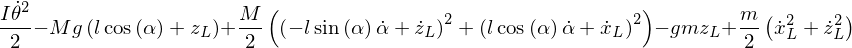

In [71]:
T = I*thetadot**2/2 + M*(xdot**2+zdot**2)/2 + m*(xLdot**2+zLdot**2)/2
V = M*g*z + m*g*zL
L = T-V
L

In [72]:
eqX = expand(diff(diff(L,xLdot),t) - diff(L,xL)-ux*u1)
eqX = collect(eqX,diff(xL,t,2))
eqX = collect(eqX,M*l)
eqX

In [73]:
eqZ = expand(diff(diff(L,zLdot),t) - diff(L,zL)-uz*u1)
eqZ = collect(collect(eqZ,diff(zL,t,2)),g)
eqZ = collect(eqZ,M*l)
eqZ

In [74]:
eqAlpha = expand(diff(diff(L,alphadot),t) - diff(L,alpha) - ualpha*u1)
eqAlpha = simplify(eqAlpha)
#eqAlpha = collect(eqAlpha,diff(alpha,t,2))
eqAlpha

In [75]:
eqTheta = expand(diff(diff(L,thetadot),t) - diff(L,theta) - u2)
eqTheta

In [76]:
res = solve([eqX,eqZ,eqAlpha,eqTheta],[diff(xL,t,2),diff(zL,t,2),diff(alpha,t,2),diff(theta,t,2)])

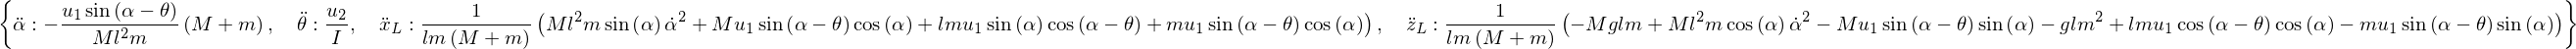

In [77]:
res

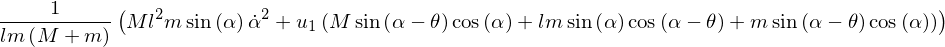

In [101]:
xLddot = res[diff(xL,t,2)]
xLddot = collect(expand(xLddot),u1)
xLddot = simplify(xLddot)
xLddot

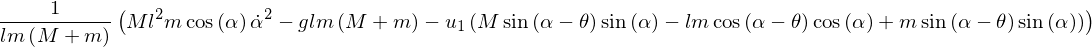

In [100]:
zLddot = res[diff(zL,t,2)]
zLddot = collect(expand(zLddot),u1)
zLddot = collect(zLddot,g)
zLddot = simplify(zLddot)
zLddot

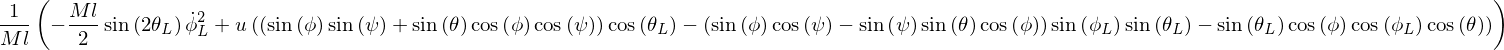

In [156]:
thetaLddot = res[diff(thetaL,t,2)]
thetaLddot = simplify(expand_trig(thetaLddot))
thetaLddot = thetaLddot.subs([(ux,cos(phi)*sin(theta)*cos(psi)+sin(phi)*sin(psi)), (uy,cos(phi)*sin(theta)*sin(psi)-sin(phi)*cos(psi)),(uz,cos(phi)*cos(theta))])
thetaLddot = simplify(collect(thetaLddot,u))
thetaLddot

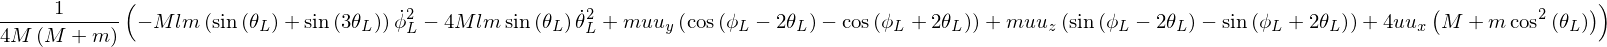

In [197]:
xddot = res[diff(x,t,2)]
xddot = collect(xddot,diff(phiL,t)**2)
xddot = collect(xddot,u*ux)
xddot = collect(xddot,u*uy)
xddot = collect(xddot,u*uz)
xddot = simplify(xddot)
xddot

In [233]:
simplify(expand_trig(sin(theta)+sin(3*theta)))

In [202]:
expand_trig(cos(phi-2*theta)-cos(phi+2*theta))

In [203]:
expand_trig(sin(phi-2*theta)-sin(phi+2*theta))

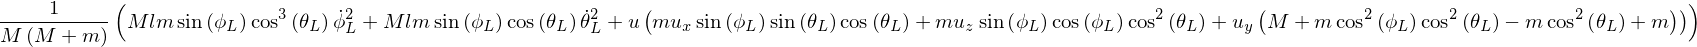

In [231]:
yddot = res[diff(y,t,2)]
yddot = collect(yddot,u*ux)
yddot = collect(yddot,u*uy)
yddot = collect(yddot,u*uz)
yddot = collect(yddot,u)
yddot

In [221]:
trigsimp(cos(phi)**2*cos(theta)**2-cos(theta)**2)

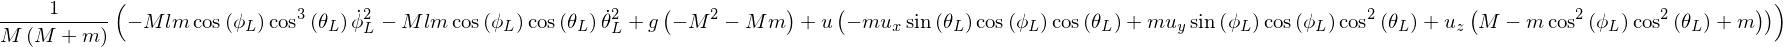

In [232]:
zddot = res[diff(z,t,2)]
zddot = collect(zddot,g)
zddot = collect(zddot,u*ux)
zddot = collect(zddot,u*uy)
zddot = collect(zddot,u*uz)
zddot = collect(zddot,u)
zddot

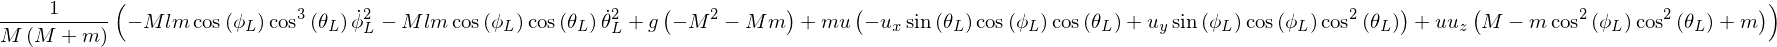

In [229]:
collect(zddot,m*u)

In [239]:
trigsimp(-cos(phi)**2*cos(theta)**2)

In [237]:
expand_trig(cos(theta)**2+1)

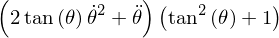

In [5]:
diff(tan(theta),t,2)